# File Information

Name: Amie Davis

Course: DSC680 - Data Science

Assignment: Project3 - Malicious Traffic Detector

Purpose: Data Preparation & Exploratory Data Analysis

Usage: Python 3.7.6

   Developed using Jupter Notebook 6.0.3

# Data Source
DarkNet 2020 dataset from the Canadian Institute for Cybersecurity at the University of New Brunswick

## Import required packages

In [2]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import yellowbrick

pd.set_option('display.max_rows', 100)

# Data Preparation

## Load & Review Data

In [3]:
# Load data into dataframe
data_file = "Data\Darknet.CSV"
df = pd.read_csv(data_file)

In [4]:
# Review Data Records
print(df.head())
print(df.dtypes)

                                      Flow ID         Src IP  Src Port  \
0     10.152.152.11-216.58.220.99-57158-443-6  10.152.152.11     57158   
1     10.152.152.11-216.58.220.99-57159-443-6  10.152.152.11     57159   
2     10.152.152.11-216.58.220.99-57160-443-6  10.152.152.11     57160   
3    10.152.152.11-74.125.136.120-49134-443-6  10.152.152.11     49134   
4  10.152.152.11-173.194.65.127-34697-19305-6  10.152.152.11     34697   

           Dst IP  Dst Port  Protocol               Timestamp  Flow Duration  \
0   216.58.220.99       443         6  24/07/2015 04:09:48 PM            229   
1   216.58.220.99       443         6  24/07/2015 04:09:48 PM            407   
2   216.58.220.99       443         6  24/07/2015 04:09:48 PM            431   
3  74.125.136.120       443         6  24/07/2015 04:09:48 PM            359   
4  173.194.65.127     19305         6  24/07/2015 04:09:45 PM       10778451   

   Total Fwd Packet  Total Bwd packets  ...  Active Mean  Active Std  \
0 

Initial dataset is 85 columns

## Derived Columns

In [5]:
# Split ip address fields
def ip_class_a(x):
    ip_list = x.split(".")
    class_a = ip_list[0]
    return class_a

def ip_class_b(x):
    ip_list = x.split(".")
    class_b = ip_list[1]
    return class_b

def ip_class_c(x):
    ip_list = x.split(".")
    class_c = ip_list[2]
    return class_c

def ip_host(x):
    ip_list = x.split(".")
    host = ip_list[3]
    return host

df['src_ip_class_a']=df['Src IP'].apply(ip_class_a)
df['src_ip_class_b']=df['Src IP'].apply(ip_class_b)
df['src_ip_class_c']=df['Src IP'].apply(ip_class_c)
df['src_ip_host']=df['Src IP'].apply(ip_host)

df['dst_ip_class_a']=df['Dst IP'].apply(ip_class_a)
df['dst_ip_class_b']=df['Dst IP'].apply(ip_class_b)
df['dst_ip_class_c']=df['Dst IP'].apply(ip_class_c)
df['dst_ip_host']=df['Dst IP'].apply(ip_host)

# Convert derived columns to integer from string
df['src_ip_class_a'] = df.src_ip_class_a.astype(int)
df['src_ip_class_b'] = df.src_ip_class_b.astype(int)
df['src_ip_class_c'] = df.src_ip_class_c.astype(int)
df['src_ip_host'] = df.src_ip_host.astype(int)

df['dst_ip_class_a'] = df.dst_ip_class_a.astype(int)
df['dst_ip_class_b'] = df.dst_ip_class_b.astype(int)
df['dst_ip_class_c'] = df.dst_ip_class_c.astype(int)
df['dst_ip_host'] = df.dst_ip_host.astype(int)

#df.tail(5)

## Data Cleaning

In [6]:
# Filter dataset to select Tor and Non-Tor records only
tor_df = df[(df.Label == 'Tor') | (df.Label == 'Non-Tor')]

In [7]:
# Rename column names with slashes
tor_df.rename(columns = {'Flow Bytes/s':'Flow Bytes'}, inplace = True)
tor_df.rename(columns = {'Flow Packets/s':'Flow Packets'}, inplace = True)
tor_df.rename(columns = {'Fwd Packets/s':'Fwd Packets'}, inplace = True)
tor_df.rename(columns = {'Bwd Packets/s':'Bwd Packets'}, inplace = True)

# Fix case in traffic category
tor_df['Label.1'].replace({'AUDIO-STREAMING': 'Audio-Streaming'}, inplace=True)
tor_df['Label.1'].replace({'File-transfer': 'File-Transfer'}, inplace=True)

tor_df.tail(5)

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,...,Label,Label.1,src_ip_class_a,src_ip_class_b,src_ip_class_c,src_ip_host,dst_ip_class_a,dst_ip_class_b,dst_ip_class_c,dst_ip_host
118606,131.202.240.150-131.202.244.5-38248-53-17,131.202.240.150,38248,131.202.244.5,53,17,2/4/2015 11:28,89326,1,1,...,Tor,Video-Streaming,131,202,240,150,131,202,244,5
118607,8.6.0.1-8.0.6.4-0-0-0,8.6.0.1,0,8.0.6.4,0,0,2/4/2015 11:29,16,2,0,...,Tor,Video-Streaming,8,6,0,1,8,0,6,4
118608,131.202.240.150-216.58.219.195-53347-80-6,131.202.240.150,53347,216.58.219.195,80,6,2/4/2015 11:28,90113836,3,3,...,Tor,Video-Streaming,131,202,240,150,216,58,219,195
118609,131.202.240.150-173.194.123.100-40594-443-6,131.202.240.150,40594,173.194.123.100,443,6,2/4/2015 11:28,90141353,3,3,...,Tor,Video-Streaming,131,202,240,150,173,194,123,100
118610,131.202.240.150-173.194.123.48-47131-80-6,131.202.240.150,47131,173.194.123.48,80,6,2/4/2015 11:28,90137239,3,3,...,Tor,Video-Streaming,131,202,240,150,173,194,123,48


### Handle Missing Values

In [8]:
# Find features with missing values
print('Missing Values:')
print(tor_df.isnull().sum())

# Replace missing values with 0
tor_df['Flow Bytes'].fillna(0, inplace = True)
#print(tor_df.isnull().sum())

# Impute values labeled as 'Infinity' with a number 100 times greater than the max value of the column
# Flow Packets
print(np.isinf(tor_df['Flow Packets']).values.sum())
tor_df['Flow Packets'] = tor_df['Flow Packets'].replace(np.inf,20000000)
#print(np.isinf(tor_df['Flow Packets']).values.sum())

# Flow Bytes
print(np.isinf(tor_df['Flow Bytes']).values.sum())
tor_df['Flow Bytes'] = tor_df['Flow Bytes'].replace(np.inf,34600000000)
#print(np.isinf(tor_df['Flow Packets']).values.sum())


Missing Values:
Flow ID                        0
Src IP                         0
Src Port                       0
Dst IP                         0
Dst Port                       0
Protocol                       0
Timestamp                      0
Flow Duration                  0
Total Fwd Packet               0
Total Bwd packets              0
Total Length of Fwd Packet     0
Total Length of Bwd Packet     0
Fwd Packet Length Max          0
Fwd Packet Length Min          0
Fwd Packet Length Mean         0
Fwd Packet Length Std          0
Bwd Packet Length Max          0
Bwd Packet Length Min          0
Bwd Packet Length Mean         0
Bwd Packet Length Std          0
Flow Bytes                    45
Flow Packets                   0
Flow IAT Mean                  0
Flow IAT Std                   0
Flow IAT Max                   0
Flow IAT Min                   0
Fwd IAT Total                  0
Fwd IAT Mean                   0
Fwd IAT Std                    0
Fwd IAT Max                

### Remove Zero Value Columns

In [9]:
# Remove columns that have only zero values
tor_df = tor_df.drop(tor_df.columns[tor_df.iloc[-1,:]==0],axis=1)

tor_df.head(5)

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,...,Label,Label.1,src_ip_class_a,src_ip_class_b,src_ip_class_c,src_ip_host,dst_ip_class_a,dst_ip_class_b,dst_ip_class_c,dst_ip_host
0,10.152.152.11-216.58.220.99-57158-443-6,10.152.152.11,57158,216.58.220.99,443,6,24/07/2015 04:09:48 PM,229,1,1,...,Non-Tor,Audio-Streaming,10,152,152,11,216,58,220,99
1,10.152.152.11-216.58.220.99-57159-443-6,10.152.152.11,57159,216.58.220.99,443,6,24/07/2015 04:09:48 PM,407,1,1,...,Non-Tor,Audio-Streaming,10,152,152,11,216,58,220,99
2,10.152.152.11-216.58.220.99-57160-443-6,10.152.152.11,57160,216.58.220.99,443,6,24/07/2015 04:09:48 PM,431,1,1,...,Non-Tor,Audio-Streaming,10,152,152,11,216,58,220,99
3,10.152.152.11-74.125.136.120-49134-443-6,10.152.152.11,49134,74.125.136.120,443,6,24/07/2015 04:09:48 PM,359,1,1,...,Non-Tor,Audio-Streaming,10,152,152,11,74,125,136,120
4,10.152.152.11-173.194.65.127-34697-19305-6,10.152.152.11,34697,173.194.65.127,19305,6,24/07/2015 04:09:45 PM,10778451,591,400,...,Non-Tor,Audio-Streaming,10,152,152,11,173,194,65,127


### Encoding

In [10]:
# Create binary target variable
# Create indicator to store label as 1 for Tor traffic and 0 for Non-Tor traffic
def tor_indicator(x):
    if x == 'Tor':
        tor_indicator = 1
    else:
        tor_indicator = 0
    return tor_indicator

tor_df['tor_indicator']=tor_df['Label'].apply(tor_indicator)

#tor_df.tail()

In [11]:
# Convert categorical data to numeric

# Get categorical data
data_cat = tor_df['Label.1']

print('Data Before Encoding:')
print(data_cat.head(5))

# One Hot Encoding 
data_cat_dummies = pd.get_dummies(data_cat)

print('Data After Encoding:')
print(data_cat_dummies.head(5))

Data Before Encoding:
0    Audio-Streaming
1    Audio-Streaming
2    Audio-Streaming
3    Audio-Streaming
4    Audio-Streaming
Name: Label.1, dtype: object
Data After Encoding:
   Audio-Streaming  Browsing  Chat  Email  File-Transfer  P2P  VOIP  \
0                1         0     0      0              0    0     0   
1                1         0     0      0              0    0     0   
2                1         0     0      0              0    0     0   
3                1         0     0      0              0    0     0   
4                1         0     0      0              0    0     0   

   Video-Streaming  
0                0  
1                0  
2                0  
3                0  
4                0  


In [12]:
# Concat encoded columns
num_df = pd.concat([tor_df, data_cat_dummies], axis=1)

# Drop unneeded columns
num_df.drop(['Flow ID','Src IP','Dst IP','Timestamp','Label','Label.1'], axis=1, inplace = True)

num_df.columns

Index(['Src Port', 'Dst Port', 'Protocol', 'Flow Duration', 'Total Fwd Packet',
       'Total Bwd packets', 'Flow Packets', 'Flow IAT Mean', 'Flow IAT Std',
       'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean',
       'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total',
       'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min',
       'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets', 'Bwd Packets',
       'ACK Flag Count', 'Down/Up Ratio', 'FWD Init Win Bytes',
       'Bwd Init Win Bytes', 'Fwd Seg Size Min', 'Idle Mean', 'Idle Std',
       'Idle Max', 'Idle Min', 'src_ip_class_a', 'src_ip_class_b',
       'src_ip_class_c', 'src_ip_host', 'dst_ip_class_a', 'dst_ip_class_b',
       'dst_ip_class_c', 'dst_ip_host', 'tor_indicator', 'Audio-Streaming',
       'Browsing', 'Chat', 'Email', 'File-Transfer', 'P2P', 'VOIP',
       'Video-Streaming'],
      dtype='object')

# Exploratory Data Analysis

## Summary Statistics

In [13]:
# Review summary statistics
print("Describe Data")
print(num_df.describe())

Describe Data
           Src Port      Dst Port      Protocol  Flow Duration  \
count  94748.000000  94748.000000  94748.000000   9.474800e+04   
mean   38491.592910  23329.584878      8.498216   2.334172e+07   
std    18384.534002  23287.997612      4.622047   3.928250e+07   
min        0.000000      0.000000      0.000000   0.000000e+00   
25%    34117.000000     80.000000      6.000000   5.584500e+04   
50%    43444.000000  14363.000000      6.000000   8.035165e+05   
75%    52299.000000  48654.000000      6.000000   1.831178e+07   
max    65533.000000  65535.000000     17.000000   1.200000e+08   

       Total Fwd Packet  Total Bwd packets  Flow Packets  Flow IAT Mean  \
count      94748.000000       94748.000000  9.474800e+04   9.474800e+04   
mean         146.747573         129.187423  2.373881e+04   2.741408e+06   
std         1896.154058        1491.077454  4.479391e+05   6.954931e+06   
min            1.000000           0.000000  1.666877e-02   0.000000e+00   
25%            2

## Histograms

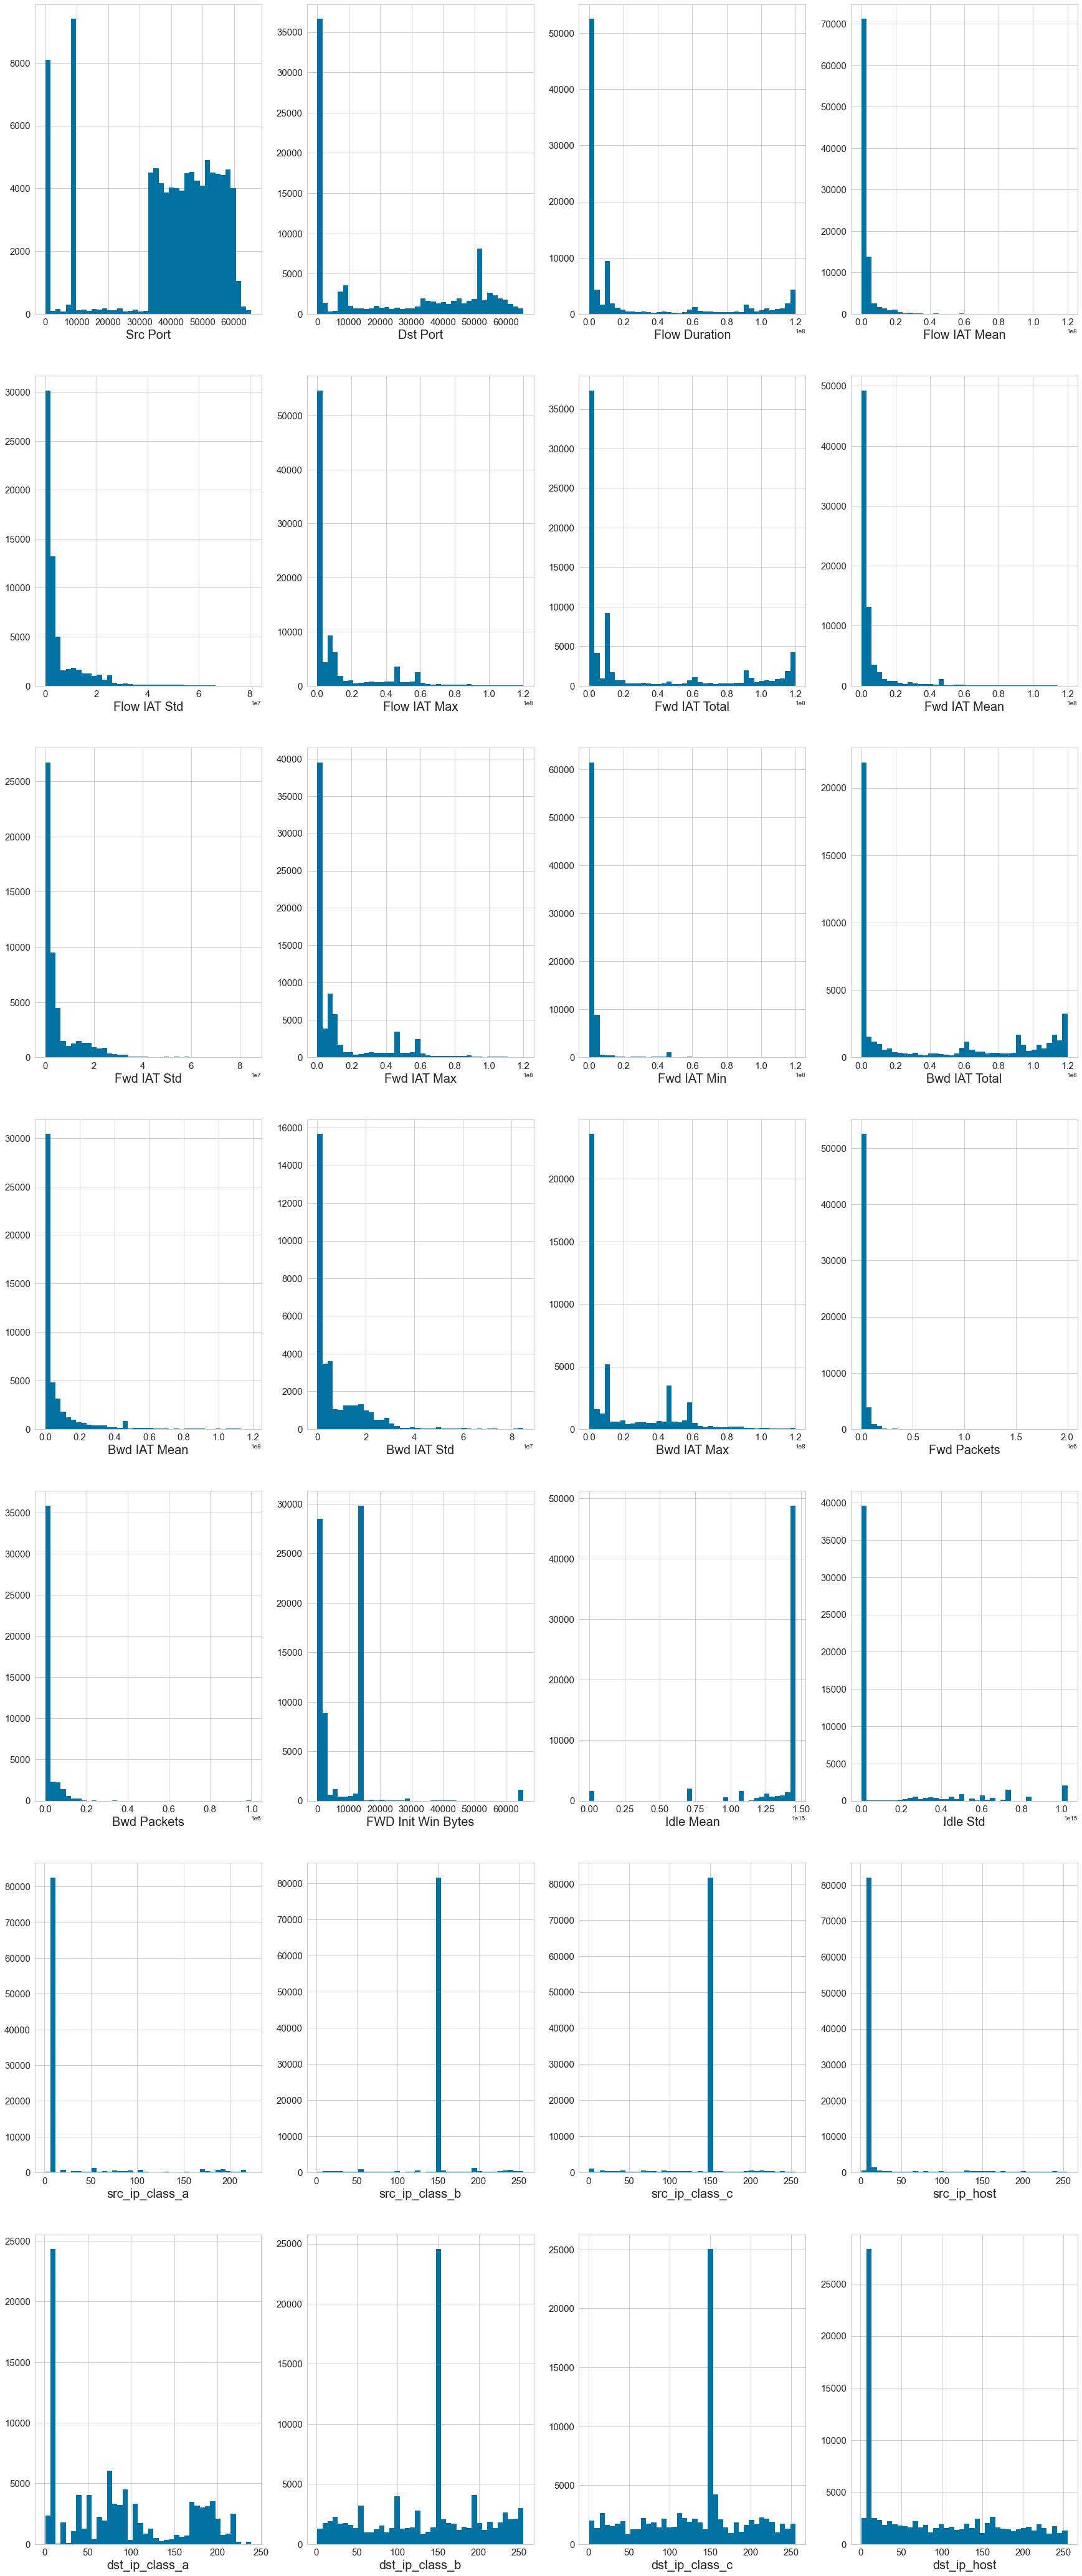

In [14]:
# Plot histograms for numeric variables

# Import packages
import matplotlib.pyplot as plt

# Set up the figure size
plt.rcParams['figure.figsize'] = (30, 75)

# Make subplots
fig, axes = plt.subplots(nrows = 7, ncols = 4)

# Specify the features of interest              
num_features = ['Src Port', 'Dst Port', 'Flow Duration',
       'Flow IAT Mean', 'Flow IAT Std',
       'Flow IAT Max', 'Fwd IAT Total', 'Fwd IAT Mean',
       'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total',
       'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Fwd Packets', 'Bwd Packets', 'FWD Init Win Bytes',
       'Idle Mean', 'Idle Std',
       'src_ip_class_a', 'src_ip_class_b',
       'src_ip_class_c', 'src_ip_host', 'dst_ip_class_a', 'dst_ip_class_b',
       'dst_ip_class_c', 'dst_ip_host']

xaxes = num_features
yaxes = ['Counts', 'Counts', 'Counts', 'Counts', 'Counts',
         'Counts', 'Counts', 'Counts', 'Counts', 'Counts',
         'Counts', 'Counts', 'Counts', 'Counts', 'Counts',
         'Counts', 'Counts', 'Counts', 'Counts', 'Counts',
         'Counts', 'Counts', 'Counts', 'Counts', 'Counts']

# Draw histograms,
axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.hist(num_df[num_features[idx]].dropna(), bins=40, range=(1,num_df[num_features[idx]].max()))
    ax.set_xlabel(xaxes[idx], fontsize=20)
    ax.tick_params(axis='both', labelsize=15)
    
plt.show()


## Bar Charts

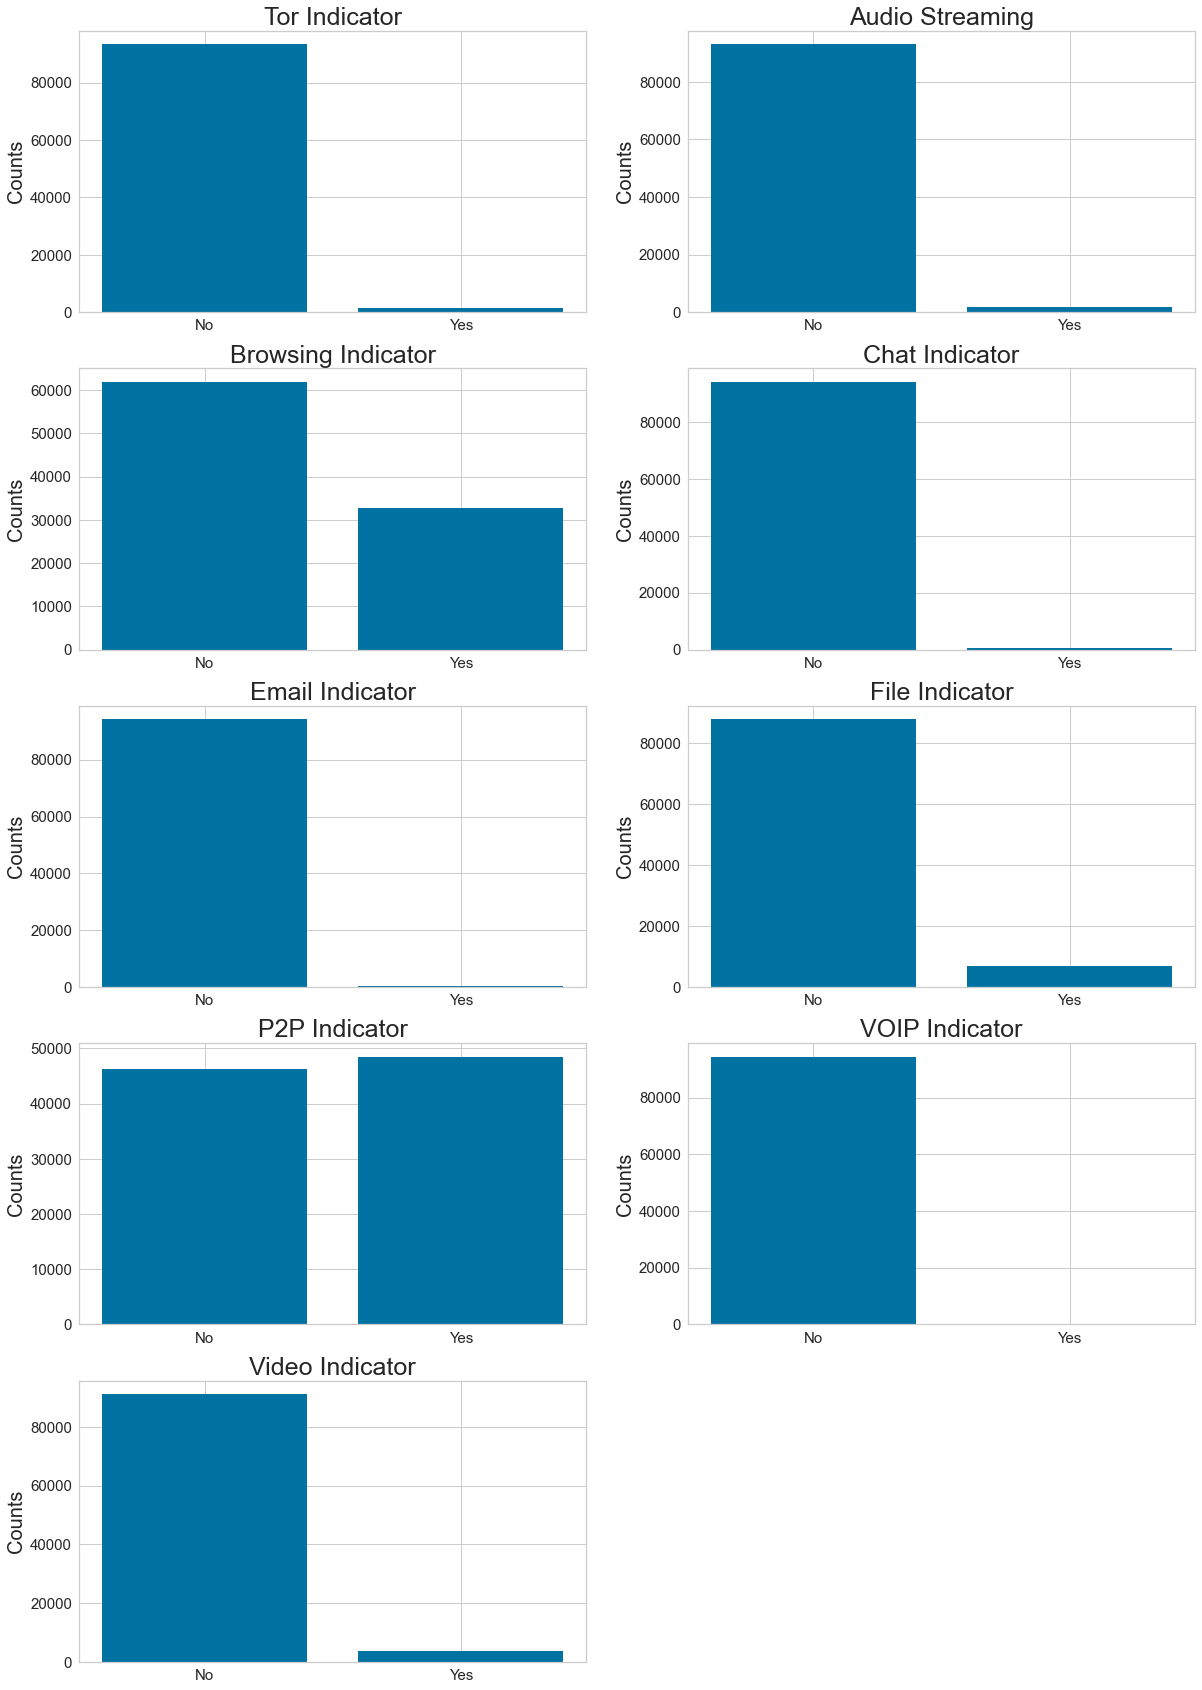

In [15]:
# Make bar charts for categorical variables.
# tor_indicator
# Audio-Streaming 	Browsing 	Chat 	Email 	File-Transfer 	P2P 	VOIP 	Video-Streaming

# Set up the figure size
plt.rcParams['figure.figsize'] = (20, 30)

# Make subplots
fig, axes = plt.subplots(nrows = 5, ncols = 2)

# Plot Tor Indicator
# Replace category name
# Group by category
X_tor_ind = num_df.replace({'tor_indicator': {1: 'Yes', 0: 'No'}}).groupby('tor_indicator').size().reset_index(name='Counts')['tor_indicator']
Y_tor_ind = num_df.replace({'tor_indicator': {1: 'Yes', 0: 'No'}}).groupby('tor_indicator').size().reset_index(name='Counts')['Counts']

# Create the bar plot
axes[0, 0].bar(X_tor_ind, Y_tor_ind)
axes[0, 0].set_title('Tor Indicator', fontsize=25)
axes[0, 0].set_ylabel('Counts', fontsize=20)
axes[0, 0].tick_params(axis='both', labelsize=15)

# Plot Audio Indicator
# Replace category name
# Group by category
X_audio_ind = num_df.replace({'Audio-Streaming': {1: 'Yes', 0: 'No'}}).groupby('Audio-Streaming').size().reset_index(name='Counts')['Audio-Streaming']
Y_audio_ind = num_df.replace({'Audio-Streaming': {1: 'Yes', 0: 'No'}}).groupby('Audio-Streaming').size().reset_index(name='Counts')['Counts']

# Create the bar plot
axes[0, 1].bar(X_audio_ind, Y_audio_ind)
axes[0, 1].set_title('Audio Streaming', fontsize=25)
axes[0, 1].set_ylabel('Counts', fontsize=20)
axes[0, 1].tick_params(axis='both', labelsize=15)

# Plot Browsing Indicator
# Replace category name
# Group by category
X_brows_ind = num_df.replace({'Browsing': {1: 'Yes', 0: 'No'}}).groupby('Browsing').size().reset_index(name='Counts')['Browsing']
Y_brows_ind = num_df.replace({'Browsing': {1: 'Yes', 0: 'No'}}).groupby('Browsing').size().reset_index(name='Counts')['Counts']

# Create the bar plot
axes[1, 0].bar(X_brows_ind, Y_brows_ind)
axes[1, 0].set_title('Browsing Indicator', fontsize=25)
axes[1, 0].set_ylabel('Counts', fontsize=20)
axes[1, 0].tick_params(axis='both', labelsize=15)

# Plot Chat Indicator
# Replace category name
# Group by category
X_chat_ind = num_df.replace({'Chat': {1: 'Yes', 0: 'No'}}).groupby('Chat').size().reset_index(name='Counts')['Chat']
Y_chat_ind = num_df.replace({'Chat': {1: 'Yes', 0: 'No'}}).groupby('Chat').size().reset_index(name='Counts')['Counts']

# Create the bar plot
axes[1, 1].bar(X_chat_ind, Y_chat_ind)
axes[1, 1].set_title('Chat Indicator', fontsize=25)
axes[1, 1].set_ylabel('Counts', fontsize=20)
axes[1, 1].tick_params(axis='both', labelsize=15)

# Plot Email Indicator
# Replace category name
# Group by category
X_email_ind = num_df.replace({'Email': {1: 'Yes', 0: 'No'}}).groupby('Email').size().reset_index(name='Counts')['Email']
Y_email_ind = num_df.replace({'Email': {1: 'Yes', 0: 'No'}}).groupby('Email').size().reset_index(name='Counts')['Counts']

# Create the bar plot
axes[2, 0].bar(X_email_ind, Y_email_ind)
axes[2, 0].set_title('Email Indicator', fontsize=25)
axes[2, 0].set_ylabel('Counts', fontsize=20)
axes[2, 0].tick_params(axis='both', labelsize=15)

# Plot File Indicator
# Replace category name
# Group by category
X_file_ind = num_df.replace({'File-Transfer': {1: 'Yes', 0: 'No'}}).groupby('File-Transfer').size().reset_index(name='Counts')['File-Transfer']
Y_file_ind = num_df.replace({'File-Transfer': {1: 'Yes', 0: 'No'}}).groupby('File-Transfer').size().reset_index(name='Counts')['Counts']

# Create the bar plot
axes[2, 1].bar(X_file_ind, Y_file_ind)
axes[2, 1].set_title('File Indicator', fontsize=25)
axes[2, 1].set_ylabel('Counts', fontsize=20)
axes[2, 1].tick_params(axis='both', labelsize=15)

# Plot P2P Indicator
# Replace category name
# Group by category
X_p2p_ind = num_df.replace({'P2P': {1: 'Yes', 0: 'No'}}).groupby('P2P').size().reset_index(name='Counts')['P2P']
Y_p2p_ind = num_df.replace({'P2P': {1: 'Yes', 0: 'No'}}).groupby('P2P').size().reset_index(name='Counts')['Counts']

# Create the bar plot
axes[3, 0].bar(X_p2p_ind, Y_p2p_ind)
axes[3, 0].set_title('P2P Indicator', fontsize=25)
axes[3, 0].set_ylabel('Counts', fontsize=20)
axes[3, 0].tick_params(axis='both', labelsize=15)

# Plot VOIP Indicator
# Replace category name
# Group by category
X_voip_ind = num_df.replace({'VOIP': {1: 'Yes', 0: 'No'}}).groupby('VOIP').size().reset_index(name='Counts')['VOIP']
Y_voip_ind = num_df.replace({'VOIP': {1: 'Yes', 0: 'No'}}).groupby('VOIP').size().reset_index(name='Counts')['Counts']

# Create the bar plot
axes[3, 1].bar(X_voip_ind, Y_voip_ind)
axes[3, 1].set_title('VOIP Indicator', fontsize=25)
axes[3, 1].set_ylabel('Counts', fontsize=20)
axes[3, 1].tick_params(axis='both', labelsize=15)

# Plot Video Indicator
# Replace category name
# Group by category
X_video_ind = num_df.replace({'Video-Streaming': {1: 'Yes', 0: 'No'}}).groupby('Video-Streaming').size().reset_index(name='Counts')['Video-Streaming']
Y_video_ind = num_df.replace({'Video-Streaming': {1: 'Yes', 0: 'No'}}).groupby('Video-Streaming').size().reset_index(name='Counts')['Counts']

# Create the bar plot
axes[4, 0].bar(X_video_ind, Y_video_ind)
axes[4, 0].set_title('Video Indicator', fontsize=25)
axes[4, 0].set_ylabel('Counts', fontsize=20)
axes[4, 0].tick_params(axis='both', labelsize=15)

# Remove unneeded axes since there is an odd number of plots
plt.delaxes(axes[4, 1])

### Analysis
The target variable is imbalanced.

## Correlation

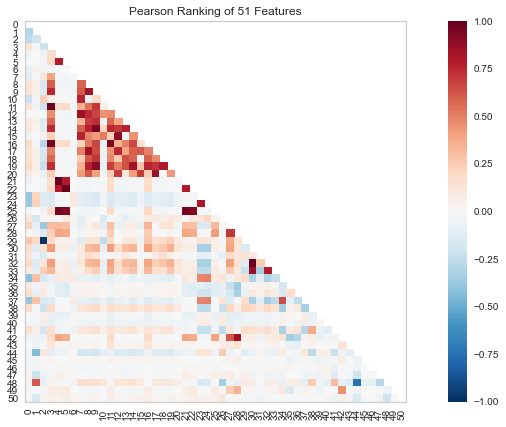

In [16]:
# To see if the data is correlated, use Pearson Ranking against the numerical features

# Import packages
from yellowbrick.features import Rank2D

# Set up the figure size
plt.rcParams['figure.figsize'] = (15, 7)

X = num_df.values

# Instantiate the visualizer with the Covariance ranking algorithm
visualizer = Rank2D(algorithm='pearson')
visualizer.fit(X)    # Fit the data to the visualizer
visualizer.transform(X)    # Transform the data

# Draw/show/poof the data
visualizer.poof(outpath="corr_matrix_1.png") 
plt.show()

### Analysis
The darker the color, the greater the correlation.  Some of these are dark red, meaning they are overly correlated, and can be removed from the feature set.

In [17]:
# Find overly correlated features to remove
# Many of the features are aggreated, which explains why so many are correlated

correlated_features = set()
correlation_matrix = num_df.corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)
# List overly correlated features            
print(correlated_features)

# Drop overly correlated features
model_df = num_df.drop(labels=correlated_features, axis=1)

# Add back on target variable
# Concat encoded columns
model_df = pd.concat([model_df, num_df.tor_indicator], axis=1)

model_df.head(5)

{'ACK Flag Count', 'Fwd IAT Total', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd Packets', 'Bwd IAT Total', 'Bwd IAT Max', 'Idle Max', 'Flow IAT Max', 'Bwd IAT Min', 'Bwd IAT Mean', 'Fwd Header Length', 'tor_indicator', 'Fwd Seg Size Min', 'Idle Min', 'Fwd IAT Mean', 'Bwd Header Length'}


,Src Port,Dst Port,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Flow Packets,Flow IAT Mean,Flow IAT Std,Flow IAT Min,...,dst_ip_host,Audio-Streaming,Browsing,Chat,Email,File-Transfer,P2P,VOIP,Video-Streaming,tor_indicator
0,57158,443,6,229,1,1,8733.624454,229.00000,0.00000,229,...,99,1,0,0,0,0,0,0,0,0
1,57159,443,6,407,1,1,4914.004914,407.00000,0.00000,407,...,99,1,0,0,0,0,0,0,0,0
2,57160,443,6,431,1,1,4640.371230,431.00000,0.00000,431,...,99,1,0,0,0,0,0,0,0,0
3,49134,443,6,359,1,1,5571.030641,359.00000,0.00000,359,...,120,1,0,0,0,0,0,0,0,0
4,34697,19305,6,10778451,591,400,91.942711,10887.32424,11412.46641,13,...,127,1,0,0,0,0,0,0,0,0


Limited to 35 columns

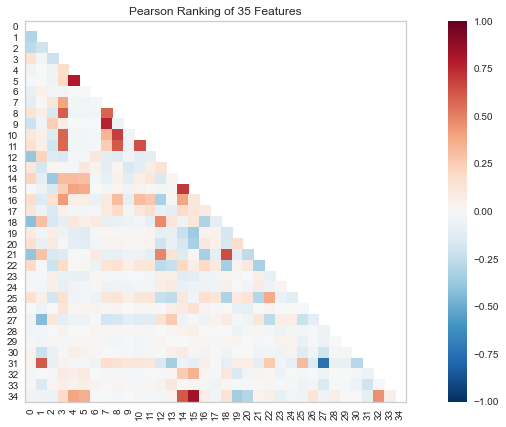

In [18]:
# Run new correlation matrix

# Import packages
from yellowbrick.features import Rank2D

# Set up the figure size
plt.rcParams['figure.figsize'] = (15, 7)

X = model_df.values

# Instantiate the visualizer with the Covariance ranking algorithm
visualizer = Rank2D(algorithm='pearson')
visualizer.fit(X)    # Fit the data to the visualizer
visualizer.transform(X)    # Transform the data

# Draw/show/poof the data
visualizer.poof(outpath="corr_matrix_2.png") 
plt.show()

## Stacked Bar Charts

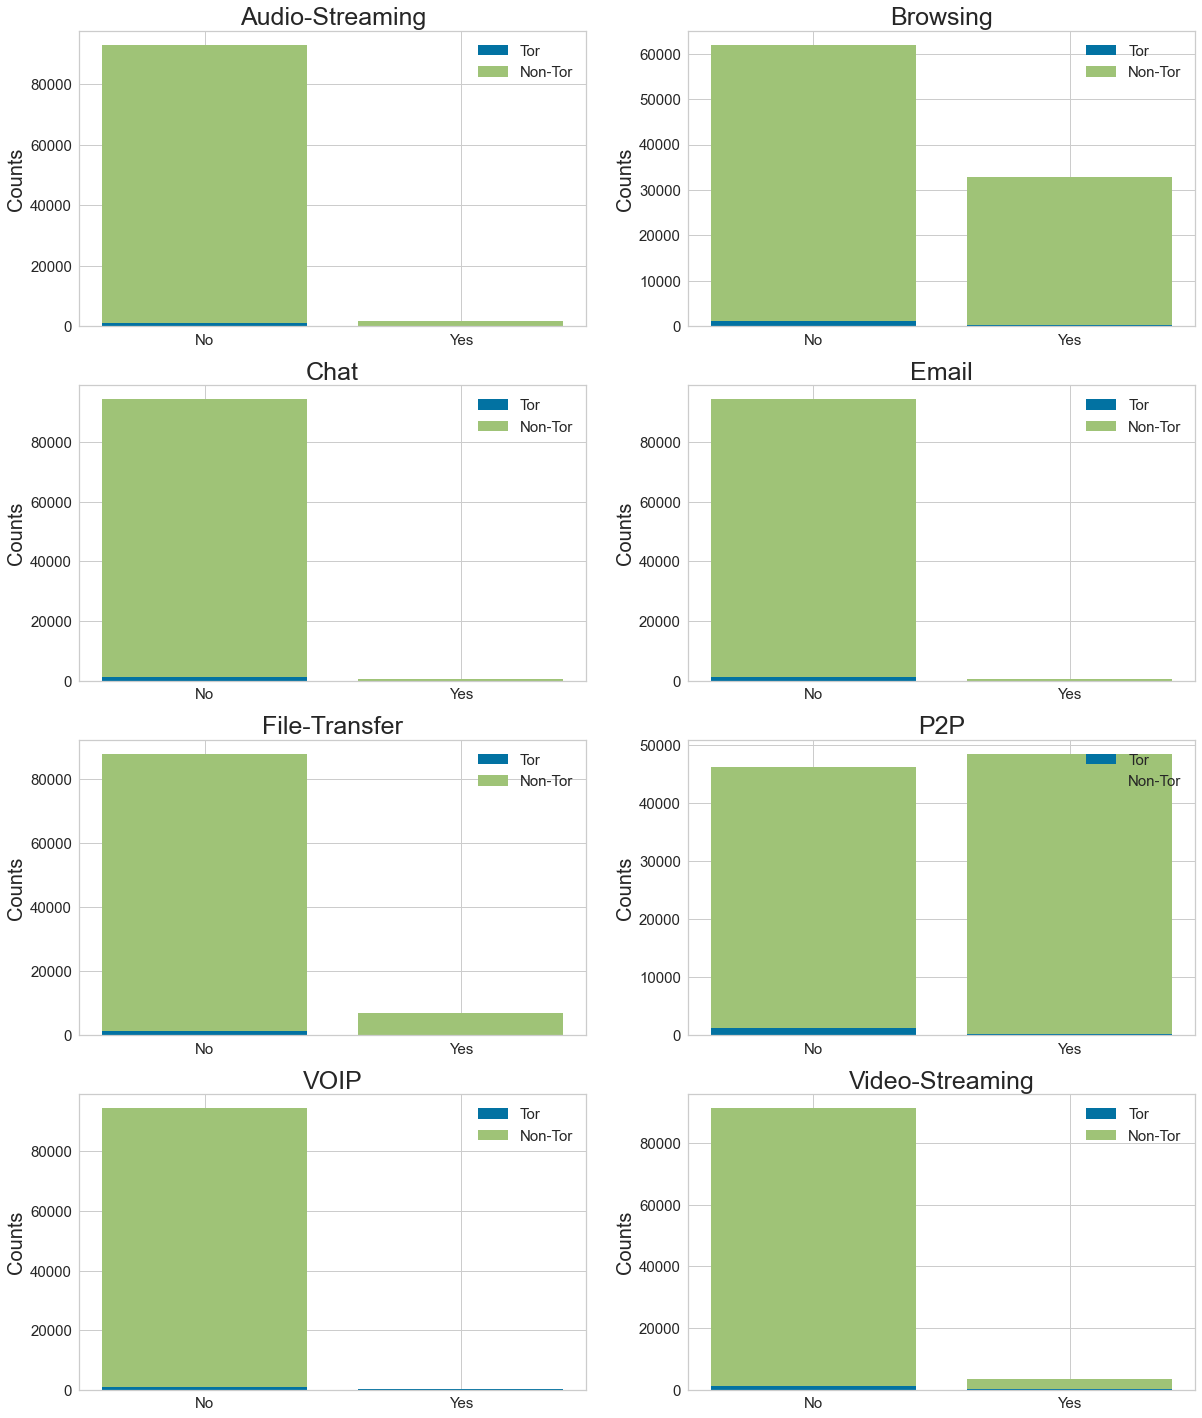

In [19]:
# Use Stack Bar Charts to compare Tor and Non-Tor traffic
# based on the other categorical variables.

# Set up the figure size
plt.rcParams['figure.figsize'] = (20, 25)

# Make subplots
fig, axes = plt.subplots(nrows = 4, ncols = 2)

# Plot Audio Indicator
# Group by Tor Indicator
audio_tor = model_df.replace({'tor_indicator': {1: 'Tor', 0: 'Non-Tor'}}).replace({'Audio-Streaming': {0: 'No', 1: 'Yes'}})[model_df['tor_indicator']==1]['Audio-Streaming'].value_counts()
audio_nontor = model_df.replace({'tor_indicator': {1: 'Tor', 0: 'Non-Tor'}}).replace({'Audio-Streaming': {0: 'No', 1: 'Yes'}})[model_df['tor_indicator']==0]['Audio-Streaming'].value_counts()
audio_nontor = audio_nontor.reindex(index = audio_tor.index)

# Make the bar plot
p1 = axes[0, 0].bar(audio_tor.index, audio_tor.values)
p2 = axes[0, 0].bar(audio_nontor.index, audio_nontor.values, bottom=audio_tor.values)
axes[0, 0].set_title('Audio-Streaming', fontsize=25)
axes[0, 0].set_ylabel('Counts', fontsize=20)
axes[0, 0].tick_params(axis='both', labelsize=15)
axes[0, 0].legend((p1[0], p2[0]), ('Tor', 'Non-Tor'), fontsize = 15)

# Plot Browsing Indicator
# Group by Tor Indicator
brows_tor = model_df.replace({'tor_indicator': {1: 'Tor', 0: 'Non-Tor'}}).replace({'Browsing': {0: 'No', 1: 'Yes'}})[model_df['tor_indicator']==1]['Browsing'].value_counts()
brows_nontor = model_df.replace({'tor_indicator': {1: 'Tor', 0: 'Non-Tor'}}).replace({'Browsing': {0: 'No', 1: 'Yes'}})[model_df['tor_indicator']==0]['Browsing'].value_counts()
brows_nontor = brows_nontor.reindex(index = brows_tor.index)

# Make the bar plot
p2 = axes[0, 1].bar(brows_tor.index, brows_tor.values)
p3 = axes[0, 1].bar(brows_nontor.index, brows_nontor.values, bottom=brows_tor.values)
axes[0, 1].set_title('Browsing', fontsize=25)
axes[0, 1].set_ylabel('Counts', fontsize=20)
axes[0, 1].tick_params(axis='both', labelsize=15)
axes[0, 1].legend((p2[0], p3[0]), ('Tor', 'Non-Tor'), fontsize = 15)

# Plot Chat Indicator
# Group by Tor Indicator
chat_tor = model_df.replace({'tor_indicator': {1: 'Tor', 0: 'Non-Tor'}}).replace({'Chat': {0: 'No', 1: 'Yes'}})[model_df['tor_indicator']==1]['Chat'].value_counts()
chat_nontor = model_df.replace({'tor_indicator': {1: 'Tor', 0: 'Non-Tor'}}).replace({'Chat': {0: 'No', 1: 'Yes'}})[model_df['tor_indicator']==0]['Chat'].value_counts()
chat_nontor = chat_nontor.reindex(index = chat_tor.index)

# Make the bar plot
p4 = axes[1, 0].bar(chat_tor.index, chat_tor.values)
p5 = axes[1, 0].bar(chat_nontor.index, chat_nontor.values, bottom=chat_tor.values)
axes[1, 0].set_title('Chat', fontsize=25)
axes[1, 0].set_ylabel('Counts', fontsize=20)
axes[1, 0].tick_params(axis='both', labelsize=15)
axes[1, 0].legend((p4[0], p5[0]), ('Tor', 'Non-Tor'), fontsize = 15)

# Plot Email Indicator
# Group by Tor Indicator
email_tor = model_df.replace({'tor_indicator': {1: 'Tor', 0: 'Non-Tor'}}).replace({'Email': {0: 'No', 1: 'Yes'}})[model_df['tor_indicator']==1]['Email'].value_counts()
email_nontor = model_df.replace({'tor_indicator': {1: 'Tor', 0: 'Non-Tor'}}).replace({'Email': {0: 'No', 1: 'Yes'}})[model_df['tor_indicator']==0]['Email'].value_counts()
email_nontor = email_nontor.reindex(index = email_tor.index)

# Make the bar plot
p6 = axes[1, 1].bar(email_tor.index, email_tor.values)
p7 = axes[1, 1].bar(email_nontor.index, email_nontor.values, bottom=email_tor.values)
axes[1, 1].set_title('Email', fontsize=25)
axes[1, 1].set_ylabel('Counts', fontsize=20)
axes[1, 1].tick_params(axis='both', labelsize=15)
axes[1, 1].legend((p6[0], p7[0]), ('Tor', 'Non-Tor'), fontsize = 15)

# Plot File Indicator
# Group by Tor Indicator
file_tor = model_df.replace({'tor_indicator': {1: 'Tor', 0: 'Non-Tor'}}).replace({'File-Transfer': {0: 'No', 1: 'Yes'}})[model_df['tor_indicator']==1]['File-Transfer'].value_counts()
file_nontor = model_df.replace({'tor_indicator': {1: 'Tor', 0: 'Non-Tor'}}).replace({'File-Transfer': {0: 'No', 1: 'Yes'}})[model_df['tor_indicator']==0]['File-Transfer'].value_counts()
file_nontor = file_nontor.reindex(index = file_tor.index)

# Make the bar plot
p8 = axes[2, 0].bar(file_tor.index, file_tor.values)
p9 = axes[2, 0].bar(file_nontor.index, file_nontor.values, bottom=file_tor.values)
axes[2, 0].set_title('File-Transfer', fontsize=25)
axes[2, 0].set_ylabel('Counts', fontsize=20)
axes[2, 0].tick_params(axis='both', labelsize=15)
axes[2, 0].legend((p8[0], p9[0]), ('Tor', 'Non-Tor'), fontsize = 15)

# Plot P2P Indicator
# Group by Tor Indicator
p2p_tor = model_df.replace({'tor_indicator': {1: 'Tor', 0: 'Non-Tor'}}).replace({'P2P': {0: 'No', 1: 'Yes'}})[model_df['tor_indicator']==1]['P2P'].value_counts()
p2p_nontor = model_df.replace({'tor_indicator': {1: 'Tor', 0: 'Non-Tor'}}).replace({'P2P': {0: 'No', 1: 'Yes'}})[model_df['tor_indicator']==0]['P2P'].value_counts()
p2p_nontor = p2p_nontor.reindex(index = p2p_tor.index)

# Make the bar plot
p10 = axes[2, 1].bar(p2p_tor.index, p2p_tor.values)
p11 = axes[2, 1].bar(p2p_nontor.index, p2p_nontor.values, bottom=p2p_tor.values)
axes[2, 1].set_title('P2P', fontsize=25)
axes[2, 1].set_ylabel('Counts', fontsize=20)
axes[2, 1].tick_params(axis='both', labelsize=15)
axes[2, 1].legend((p10[0], p11[0]), ('Tor', 'Non-Tor'), fontsize = 15)

# Plot VOIP Indicator
# Group by Tor Indicator
voip_tor = model_df.replace({'tor_indicator': {1: 'Tor', 0: 'Non-Tor'}}).replace({'VOIP': {0: 'No', 1: 'Yes'}})[model_df['tor_indicator']==1]['VOIP'].value_counts()
voip_nontor = model_df.replace({'tor_indicator': {1: 'Tor', 0: 'Non-Tor'}}).replace({'VOIP': {0: 'No', 1: 'Yes'}})[model_df['tor_indicator']==0]['VOIP'].value_counts()
voip_nontor = voip_nontor.reindex(index = voip_tor.index)

# Make the bar plot
p12 = axes[3, 0].bar(voip_tor.index, voip_tor.values)
p13 = axes[3, 0].bar(voip_nontor.index, voip_nontor.values, bottom=voip_tor.values)
axes[3, 0].set_title('VOIP', fontsize=25)
axes[3, 0].set_ylabel('Counts', fontsize=20)
axes[3, 0].tick_params(axis='both', labelsize=15)
axes[3, 0].legend((p12[0], p13[0]), ('Tor', 'Non-Tor'), fontsize = 15)

# Plot Video Indicator
# Group by Tor Indicator
video_tor = model_df.replace({'tor_indicator': {1: 'Tor', 0: 'Non-Tor'}}).replace({'Video-Streaming': {0: 'No', 1: 'Yes'}})[model_df['tor_indicator']==1]['Video-Streaming'].value_counts()
video_nontor = model_df.replace({'tor_indicator': {1: 'Tor', 0: 'Non-Tor'}}).replace({'Video-Streaming': {0: 'No', 1: 'Yes'}})[model_df['tor_indicator']==0]['Video-Streaming'].value_counts()
video_nontor = video_nontor.reindex(index = video_tor.index)

# Make the bar plot
p14 = axes[3, 1].bar(video_tor.index, video_tor.values)
p15 = axes[3, 1].bar(video_nontor.index, video_nontor.values, bottom=video_tor.values)
axes[3, 1].set_title('Video-Streaming', fontsize=25)
axes[3, 1].set_ylabel('Counts', fontsize=20)
axes[3, 1].tick_params(axis='both', labelsize=15)
axes[3, 1].legend((p14[0], p15[0]), ('Tor', 'Non-Tor'), fontsize = 15)


### Analysis
This is a quick visualization to determine what traffic categories had rates of Tor traffic.  It appears that all of the VOIP traffic was designated as Tor.  Little to None of the Audio-Streaming, Chat, Email, and File Transfers were designated as Tor.

In [20]:
# Export dataset for external visualizations
model_df.to_csv(r'Data\cleaned_data.csv', index = False, header=True)

## Principal Component Analysis (PCA)

### Standardization

In [21]:
# Standardize Data
from sklearn import preprocessing

print('Original df')
print('=============================')
print(model_df.head())

# Separate features from target
#features = model_df.drop(['tor_indicator'], axis=1)

# Convert df to numpy array
x = model_df.values

# Create scaler
min_max_scaler = preprocessing.MinMaxScaler()

# Transform the feature
x_scaled = min_max_scaler.fit_transform(x)

# Convert back to Pandas dataframe
std_df = pd.DataFrame(x_scaled, columns = 
['Src Port', 'Dst Port', 'Protocol', 'Flow Duration', 'Total Fwd Packet',
       'Total Bwd packets', 'Flow Packets', 'Flow IAT Mean', 'Flow IAT Std',
       'Flow IAT Min', 'Fwd IAT Std', 'Bwd IAT Std', 'Fwd Packets',
       'Down/Up Ratio', 'FWD Init Win Bytes', 'Bwd Init Win Bytes',
       'Idle Mean', 'Idle Std', 'src_ip_class_a', 'src_ip_class_b',
       'src_ip_class_c', 'src_ip_host', 'dst_ip_class_a', 'dst_ip_class_b',
       'dst_ip_class_c', 'dst_ip_host', 'Audio-Streaming', 'Browsing', 'Chat',
       'Email', 'File-Transfer', 'P2P', 'VOIP', 'Video-Streaming', 'tor_indicator'])


print()
print('Standardized df')
print('=============================')
print(std_df.head())

Original df
   Src Port  Dst Port  Protocol  Flow Duration  Total Fwd Packet  \
0     57158       443         6            229                 1   
1     57159       443         6            407                 1   
2     57160       443         6            431                 1   
3     49134       443         6            359                 1   
4     34697     19305         6       10778451               591   

   Total Bwd packets  Flow Packets  Flow IAT Mean  Flow IAT Std  Flow IAT Min  \
0                  1   8733.624454      229.00000       0.00000           229   
1                  1   4914.004914      407.00000       0.00000           407   
2                  1   4640.371230      431.00000       0.00000           431   
3                  1   5571.030641      359.00000       0.00000           359   
4                400     91.942711    10887.32424   11412.46641            13   

   ...  dst_ip_host  Audio-Streaming  Browsing  Chat  Email  File-Transfer  \
0  ...        

In [22]:
# Reduce features using Principal Components
from sklearn.decomposition import PCA

# Create PCA to retain 99% of variance
pca=PCA(n_components=0.99, whiten=True)

# Conduct PCA
features_pca = pca.fit_transform(x_scaled)

print("Original number of features:", x_scaled.shape[1])
print("Reduced number of features:", features_pca.shape[1])

# Convert Principle Components to DataFrame
principal_df = pd.DataFrame(data = features_pca, columns = ['pc_1', 'pc_2', 'pc_3', 'pc_4', 'pc_5', 
                                                            'pc_6', 'pc_7', 'pc_8', 'pc_9', 'pc_10',
                                                            'pc_11', 'pc_12', 'pc_13', 'pc_14', 'pc_15', 
                                                            'pc_16', 'pc_17', 'pc_18', 'pc_19', 'pc_20', 
                                                            'pc_21', 'pc_22', 'pc_23'])

print(principal_df.head())

# Amount of information or variance each principal component holds
print()
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Original number of features: 35
Reduced number of features: 23
       pc_1      pc_2      pc_3      pc_4      pc_5      pc_6      pc_7  \
0  0.331276  0.413040  2.424600  0.425177 -0.023575  0.827261 -0.401374   
1  0.331247  0.412699  2.424819  0.425064 -0.023010  0.827237 -0.402017   
2  0.331230  0.412488  2.424957  0.424986 -0.022623  0.827220 -0.402438   
3  0.434612  0.633386  1.813956  0.625517  0.070046  0.171876  0.429621   
4  0.039965 -0.750423  0.501914  0.502994  0.166357  0.817780  1.297204   

       pc_8      pc_9     pc_10  ...     pc_14     pc_15     pc_16     pc_17  \
0  1.284038 -1.677184  1.068523  ...  1.318552  7.014969 -1.120672  0.592536   
1  1.283188 -1.677325  1.069155  ...  1.319785  7.013268 -1.121407  0.592894   
2  1.282616 -1.677426  1.069566  ...  1.320559  7.012181 -1.121873  0.593100   
3  0.544923  0.244074 -0.191078  ...  1.260991  6.750812 -2.207052  0.734649   
4 -1.593283 -0.113862  1.233082  ...  1.259015  6.832876 -2.042183  0.690652   

     

The first principal component contains 27.9% of the variance and the second principal component contains 16.9% of the variance. Together, the two components contain 44.8% of the information.

<Figure size 1440x1800 with 0 Axes>

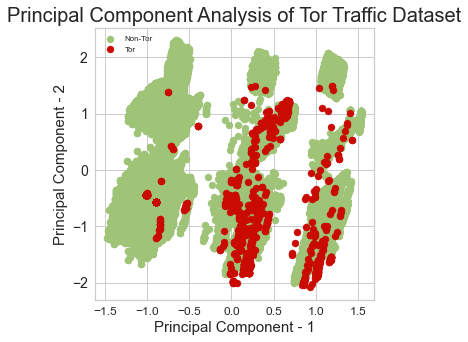

In [23]:
# Plot principal components

# Create target dataset
# Replace category name
target_values = std_df.replace({'tor_indicator': {1: 'Tor', 0: 'Non-Tor'}})['tor_indicator']
#pca_df = pd.concat([principal_df, model_df[['tor_indicator']]], axis = 1)
#print(pca_df.head())

# Show top 2 principal components on scatterplot
plt.figure()
plt.figure(figsize=(5,5))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=15)
plt.ylabel('Principal Component - 2',fontsize=15)
plt.title("Principal Component Analysis of Tor Traffic Dataset",fontsize=20)
targets = ['Non-Tor', 'Tor']
colors = ['g', 'r']
for target, color in zip(targets,colors):
    indicesToKeep = target_values == target
    plt.scatter(principal_df.loc[indicesToKeep, 'pc_1'],
                principal_df.loc[indicesToKeep, 'pc_2'],
                c = color, s = 50)

plt.legend(targets,prop={'size': 8})

### Analysis
There does not appears to be a linear separation on the PCA score plot, so I will not reduce features based on PCA.  Since I received memory errors attempting to use kernelPCA which can be used for reducing linearly inseparable data, that analysis will remain out of scope of this project, and I will retain all 35 features.

# References

https://stackabuse.com/applying-filter-methods-in-python-for-feature-selection/

https://blog.bioturing.com/2018/06/18/how-to-read-pca-biplots-and-scree-plots/